In [1]:
"""
This moduel is a proof of concept using standard deviations to actually see what you would expect the temperature to be rather than just the average.
"""
from class_ai import Temperature_Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [2]:
data = pd.read_excel("cleandata.xlsx", sheet_name=None)
tp = Temperature_Data(data)
years = tp.years
years = years[::-1]

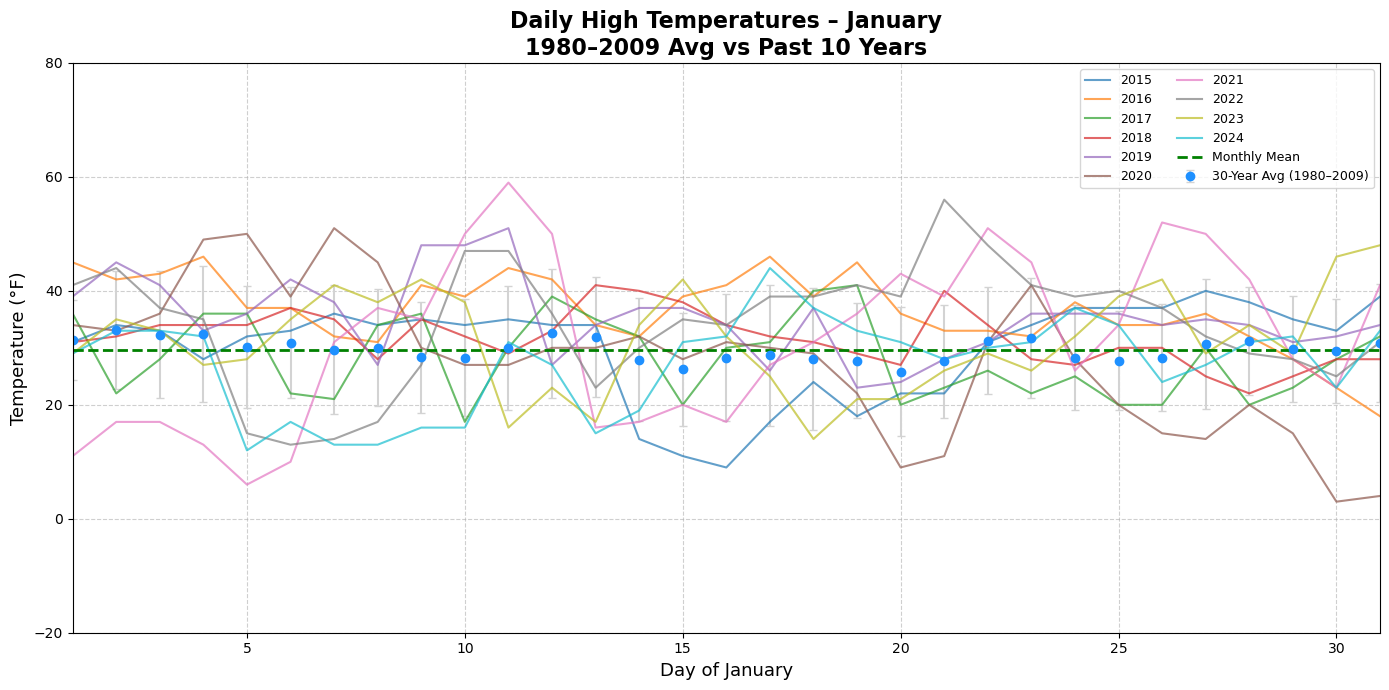

In [3]:
### Finding highs temps and std for 1980-2009 for January
year_range = years[-45:-15] # Pulls 1980 - 2009
months = np.arange(1,13) # Defines 1-12

month = 1 ## January

std_single_days = []
avgtemp_single_days = []
num_days = calendar.monthrange(2009, month)[1]
for day in np.arange(1,num_days+1):
    alltemps = tp.collect_day(month,day,0)[::-1]
    temps = alltemps[-45:-15]
    avgtemp_single_days.append(np.mean(temps))
    std_single_days.append(np.std(temps))

month_mean = np.mean(avgtemp_single_days)

### Finding January Past 10 years
temps10years = np.zeros((10,num_days))
for i in range(10):
    temps10years[i,:] = tp.collect_month(1,2024-i,0)

x = np.arange(1, num_days + 1)
avg30year = np.ones(num_days) * month_mean

# Available years (assumed order matches temps10years)
years_available = np.arange(2015, 2025)

# Create the plot
plt.figure(figsize=(14, 7))

# Plot 30-year average with error bars
plt.errorbar(
    x, avgtemp_single_days, yerr=std_single_days, fmt='o',
    color='dodgerblue', ecolor='lightgray', elinewidth=1.5, capsize=3,
    label="30-Year Avg (1980–2009)"
)

# Overlay all past 10 years
for i, year in enumerate(years_available):
    plt.plot(x, temps10years[i, :], linewidth=1.5, label=f"{year}", alpha=0.7)

# Horizontal line for monthly mean
plt.plot(x, avg30year, 'g--', linewidth=2, label="Monthly Mean")

# Titles and labels
plt.title("Daily High Temperatures – January\n1980–2009 Avg vs Past 10 Years", fontsize=16, weight='bold')
plt.xlabel("Day of January", fontsize=13)
plt.ylabel("Temperature (°F)", fontsize=13)

# Grid and limits
plt.ylim(-20, 80)
plt.xlim(1, num_days)
plt.grid(True, linestyle='--', alpha=0.6)

# Legend
plt.legend(fontsize=9, ncol=2, frameon=True, loc='upper right')
plt.tight_layout()
plt.show()


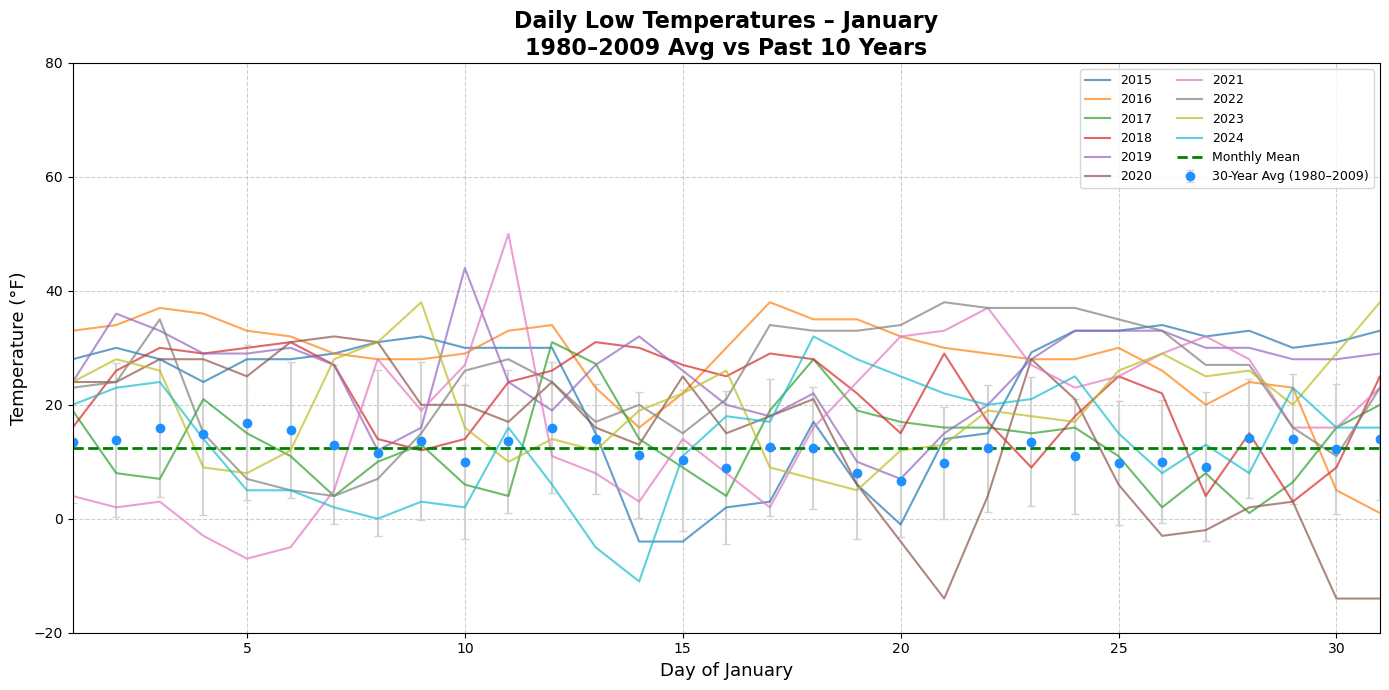

In [4]:
### Finding low temps and std for 1980-2009 for January
year_range = years[-45:-15] # Pulls 1980 - 2009
months = np.arange(1,13) # Defines 1-12

month = 1 ## January
std_single_days = []
avgtemp_single_days = []
num_days = calendar.monthrange(2009, month)[1]
for day in np.arange(1,num_days+1):
    alltemps = tp.collect_day(month,day,2)[::-1]
    temps = alltemps[-45:-15]
    avgtemp_single_days.append(np.mean(temps))
    std_single_days.append(np.std(temps))

month_mean = np.mean(avgtemp_single_days)

### Finding January Past 10 years
temps2024 = tp.collect_month(1,2024,0)
temps10years = np.zeros((10,num_days))
for i in range(10):
    temps10years[i,:] = tp.collect_month(1,2024-i,2)

x = np.arange(1, num_days + 1)
avg30year = np.ones(num_days) * month_mean

# Available years (assumed order matches temps10years)
years_available = np.arange(2015, 2025)

# Create the plot
plt.figure(figsize=(14, 7))

# Plot 30-year average with error bars
plt.errorbar(
    x, avgtemp_single_days, yerr=std_single_days, fmt='o',
    color='dodgerblue', ecolor='lightgray', elinewidth=1.5, capsize=3,
    label="30-Year Avg (1980–2009)"
)

# Overlay all past 10 years
for i, year in enumerate(years_available):
    plt.plot(x, temps10years[i, :], linewidth=1.5, label=f"{year}", alpha=0.7)

# Horizontal line for monthly mean
plt.plot(x, avg30year, 'g--', linewidth=2, label="Monthly Mean")

# Titles and labels
plt.title("Daily Low Temperatures – January\n1980–2009 Avg vs Past 10 Years", fontsize=16, weight='bold')
plt.xlabel("Day of January", fontsize=13)
plt.ylabel("Temperature (°F)", fontsize=13)

# Grid and limits
plt.ylim(-20, 80)
plt.xlim(1, num_days)
plt.grid(True, linestyle='--', alpha=0.6)

# Legend
plt.legend(fontsize=9, ncol=2, frameon=True, loc='upper right')
plt.tight_layout()
plt.show()
